<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/Data_science_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Some traditional  statistical plots

By Ayyub Sheikhi

Department of statistics,

Shahid Bahonar University of Kerman, Iran

**1-Histogram**





In [66]:
%reset -f
#del my_variable

In [67]:
# Data reading # header=None

import pandas as pd
import numpy as np
data = pd.read_csv("data_bmi.csv")
data.shape
data.head()

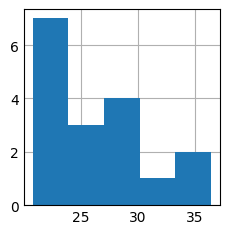

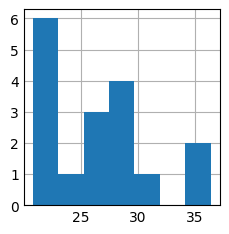

(array([1., 1., 1., 1., 2., 3., 3., 2., 1., 2.]),
 array([59.6, 61. , 62.4, 63.8, 65.2, 66.6, 68. , 69.4, 70.8, 72.2, 73.6]),
 <BarContainer object of 10 artists>)

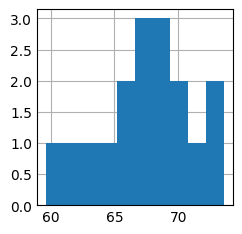

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(data.BMI, color='red')
plt.show()

plt.hist(data.AGE,color='red',alpha=0.5,bins=8)
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.title("Histogram of AGE")
plt.show()

plt.hist(data.BMI, bins=5)
plt.show()
plt.hist("BMI", data=data,bins=7)
plt.show()
plt.hist("TEMP( 0F)", data=data)

2.Boxplot

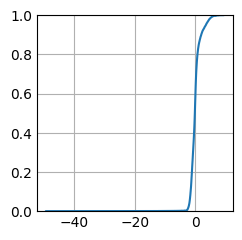

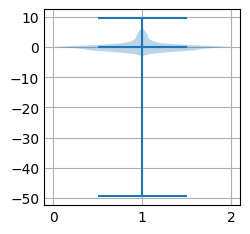

In [77]:
#plt.boxplot(data.BMI)
plt.boxplot("BMI", data=data)

plt.boxplot(data.BMI, vert=False)

#Rename a variable
data = data.rename(columns={'TEMP( 0F)': 'TEMP'})
#data = data.rename(columns={'TEMP( 0F)': 'TEMP', 'AGE': 'Age'})

data.head(5)

plt.figure(figsize=(10, 7))
plt.hist(data.BMI, bins=10)
plt.show()
plt.figure(figsize=(10, 2))
plt.boxplot(data.BMI, vert=False)
plt.show()

plt.boxplot("EXERCISE LEVEL", data=data)
plt.boxplot("FFNUM", data=data) #OUTLIER


from statistics import mean
#data["FFNUM"][16] = mean(data.FFNUM)
data.FFNUM[16]=mean(data.FFNUM)

plt.boxplot("FFNUM", data=data) #OUTLIER


dat=pd.read_csv('ACCL.csv')

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()
ax.ecdf(dat.z)
plt.show()
fig, ax = plt.subplots()
vp = ax.violinplot(dat.z, widths=2,showmeans=True, showmedians=False, showextrema=True)

# Comparing several groups using box plot

<Axes: xlabel='GENDER', ylabel='BMI'>

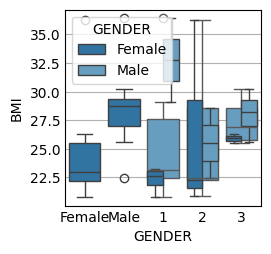

In [80]:
import seaborn as sns # to make statistical graphics more accessible and aesthetically
sns.boxplot(x='GENDER', y='BMI',data=data)
data.dtypes

data['GENDER'] = data['GENDER'].map({0: 'Female', 1: 'Male'})
data.dtypes
data.head()
sns.boxplot(x='GENDER', y='BMI',data=data)

sns.boxplot(x='EXERCISE LEVEL', y='BMI',data=data)

sns.boxplot(x='EXERCISE LEVEL', y='BMI',hue='GENDER',data=data)


Fitting a normal curve on a histogram

<Axes: xlabel='EXERCISE LEVEL', ylabel='AGE'>

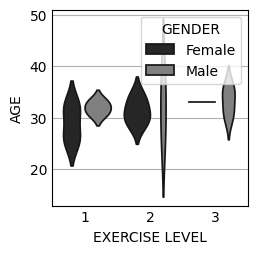

In [84]:

plt.violinplot(data.AGE)
sns.violinplot(x='GENDER', y='AGE',data=data)
sns.violinplot(x='EXERCISE LEVEL', y='BMI',data=data)
sns.violinplot(x='EXERCISE LEVEL', y='BMI',hue='GENDER',data=data)

sns.violinplot(x='EXERCISE LEVEL', y='AGE',hue='GENDER',data=data, inner=None, color='grey')





# statistical visualisation for categorical data

In [ ]:
data['AGE'].value_counts().plot(kind='pie',figsize=(5,5))
data.head()

<Axes: xlabel='GENDER'>

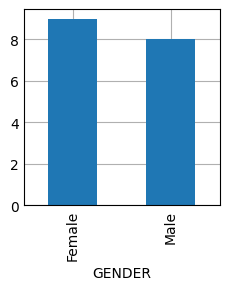

In [93]:
data.GENDER.value_counts()

data.GENDER.value_counts().plot(kind='bar')



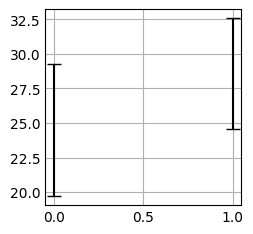

In [105]:
mean_bmi = data.groupby("GENDER")["BMI"].mean().reset_index()
mean_bmi1=pd.DataFrame(mean_bmi)
sns.barplot(data=mean_bmi1, x="GENDER", y="BMI")


mean_std_bmi = data.groupby("GENDER")["BMI"].agg(Mean="mean", Std="std").reset_index()
mean_std_bmi1=pd.DataFrame(mean_std_bmi)
sns.barplot(data=mean_std_bmi1, x="GENDER", y="Mean")
for index, row in mean_std_bmi1.iterrows():
    plt.errorbar(x=index, y=row["Mean"], yerr=row["Std"], fmt='none', capsize=5, color="black")





<Axes: xlabel='AGE', ylabel='BMI'>

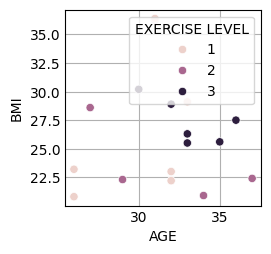

In [107]:
plt.scamean_std_bmitter(data.AGE,data.BMI)
plt.xlabel("AGE")
plt.ylabel("BMI", fontsize=12)

sns.scatterplot( x="AGE", y="BMI", hue="GENDER", data=data)

sns.scatterplot( x="AGE", y="BMI", hue="EXERCISE LEVEL", data=data)



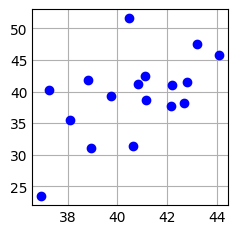

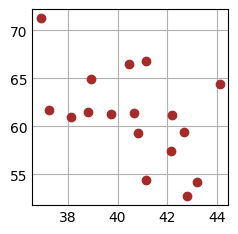

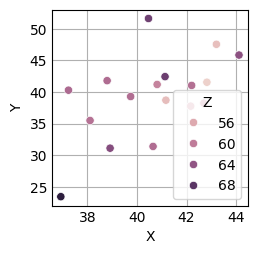

In [123]:
import numpy as np

x1 = np.random.normal(40,3,17)
y1=x1+np.random.normal(0, 5, 17)
y2=100-x1+np.random.normal(0, 5, 17)
data2=pd.DataFrame({'X':x1,'Y':y1,'Z':y2})
plt.scatter(x1, y1,color='blue')
plt.show()
plt.scatter(x1, y2, color='brown')
plt.show()
sns.scatterplot( x='X', y='Y', hue="Z", data=data2)
plt.show()


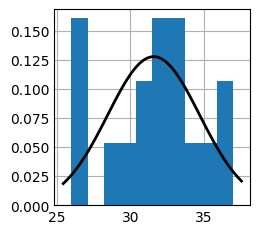

In [138]:
import numpy as np
from scipy.stats import norm

mu, std = norm.fit(data.AGE)

plt.hist(data.AGE, bins=10, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')


plt.show()